Task 1

In [131]:
# Librerías y módulos necesarios para el Task 1.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [132]:
# Lectura del archivo dataset_phishing.csv.
df = pd.read_csv("dataset_phishing.csv")

In [133]:
df.head() # Muestra las primeras 5 filas del dataframe
df.info() # Muestra información sobre las columnas y los tipos de datos
df.describe() # Muestra estadísticas descriptivas para las columnas numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [134]:
# seleccionar las columnas de tipo objeto
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(obj_cols)

['url', 'status']


In [135]:
# convertir los tipo objeto en tipo numerico para su uso futuro
encoder = LabelEncoder()
df["url"] = encoder.fit_transform(df["url"])
df["status"] = encoder.fit_transform(df["status"])

#status 0 es legitimo y 1 es phishing

In [136]:
df.head() # Muestra información sobre las columnas y los tipos de datos

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,4501,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,3063,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,8984,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,2778,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,5261,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [137]:
column_names = df.columns.tolist()

print(column_names)

['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'rat

In [138]:
#buscar si hay algun valor nan
nan_columns = df.isna().any()
print(nan_columns[nan_columns == True])


Series([], dtype: bool)


In [139]:

#buscar cuales tienen una relacion de clase menor a 0.5 porque estos son los que estan desequilibrados 
for y in column_names:
    class_counts = df[y].value_counts()
    if len(class_counts) == 2:
        class_ratio = class_counts[1] / class_counts[0]
        if class_ratio < 0.1:
            print(f"Class ratio for {y}: {class_ratio}")


Class ratio for nb_tilde: 0.006693676237449357
Class ratio for nb_star: 0.0007004027315706532
Class ratio for nb_dslash: 0.0066050198150594455
Class ratio for punycode: 0.00035007876772273763
Class ratio for port: 0.0023677979479084454
Class ratio for tld_in_path: 0.0702247191011236
Class ratio for tld_in_subdomain: 0.052777010223818734
Class ratio for abnormal_subdomain: 0.02208709648573728
Class ratio for random_domain: 0.09085703378507348
Class ratio for path_extension: 0.00017500875043752187
Class ratio for nb_external_redirection: 0.00315955766192733
Class ratio for brand_in_subdomain: 0.004128964244926645
Class ratio for brand_in_path: 0.004923509759099701
Class ratio for suspecious_tld: 0.01826280623608018
Class ratio for login_form: 0.06792488087452116
Class ratio for iframe: 0.001314060446780552
Class ratio for popup_window: 0.006073409030895168
Class ratio for onmouseover: 0.0011386528860471228
Class ratio for right_clic: 0.0014017872787804452
Class ratio for whois_registered

In [151]:
# Utilizar SMOTE para balancear el dataset
# en este caso se utilizo la y para status porque de ella es que se sabe si es legitimo o phishing
X = df.drop("status", axis=1).values
y = df["status"].values
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [152]:
# Escalar las variables si considera necesario
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

# Split para training y testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)

# Split para validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


Task 1.1 K-Nearest Neighbors

In [153]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        for x in X:
            distances = []
            for i, x_train in enumerate(self.X_train):
                distance = np.sqrt(np.sum((x_train - x)**2))
                distances.append((distance, self.y_train[i]))
            distances = sorted(distances)[:self.k]
            labels = [d[1] for d in distances]
            label = max(set(labels), key=labels.count)
            predictions.append(label)
        return predictions

    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


In [159]:
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy: 0.9461942257217848


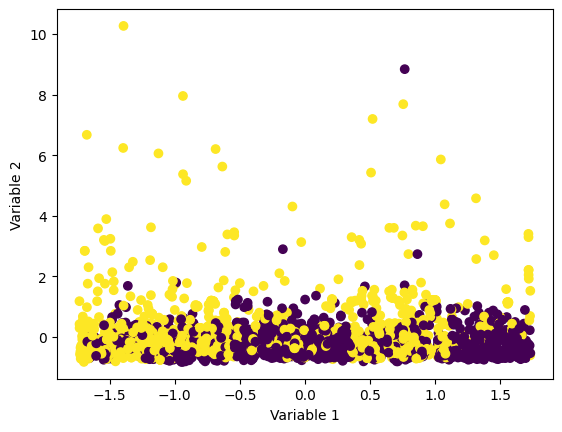

In [160]:
accuracy = knn.accuracy(y_test, y_pred)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

Algunas consideraciones adicionales que se tuvieron en cuenta durante la implementación de este algoritmo incluyen la necesidad de determinar un valor adecuado para k y la forma de manejar conjuntos de datos con dimensiones más altas. Además, se tuvo que tener en cuenta la posibilidad de que haya valores faltantes o extremos en el conjunto de datos, y cómo manejarlos de manera adecuada.

In [161]:
from sklearn.neighbors import KNeighborsClassifier


In [162]:
# Crear instancia del clasificador
knn = KNeighborsClassifier(n_neighbors=5)

# Ajustar el modelo a los datos de entrenamiento
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [163]:
# Hacer predicciones sobre los datos de prueba
y_pred = knn.predict(X_test)


In [165]:
from sklearn.metrics import accuracy_score

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9374453193350831


La implementación de librería es mucho más rápida y eficiente que la implementación desde cero, ya que está optimizada para trabajar con grandes cantidades de datos y utiliza técnicas de programación avanzadas, como la vectorización y el paralelismo. Además, la implementación de la librería ofrece una mayor cantidad de parámetros y opciones de configuración que permiten ajustar el modelo a las necesidades específicas del problema.

En conclusión, la implementación de librería es generalmente mejor que la implementación desde cero en términos de eficiencia y flexibilidad. Sin embargo, es importante tener un conocimiento profundo del algoritmo y su implementación para poder utilizar la librería de manera efectiva y comprender los resultados obtenidos.
